<a href="https://colab.research.google.com/github/tuanyuan2008/cs4641/blob/master/randomized-optimization/Knapsack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip3 install mlrose

import mlrose
import numpy as np
import matplotlib.pyplot as plt
import timeit

Knapsack Problem
======

In [0]:
weights = [10, 5, 2, 8, 15]
values = [1, 2, 3, 4, 5]
max_weight_pct = 0.6
fitness = mlrose.Knapsack(weights, values, max_weight_pct)

In [0]:
problem = mlrose.DiscreteOpt(length = 5, fitness_fn = fitness,
                         maximize = True, max_val = max(weights))

In [4]:
state = np.array([1, 0, 2, 1, 0])
fitness.evaluate(state)

11

Simulated Annealing
-------

In [0]:
# Define decay schedules
schedule = mlrose.GeomDecay()

In [6]:
dic = {}

def tune_schedule(schedule):
  fit_scores = []

  for i in range(50):
    best_state, best_fitness = mlrose.simulated_annealing(problem, schedule = schedule,
                                                          max_attempts = 10, max_iters = 1000,
                                                          init_state = state)
    print('Iteration ', str(i))
    print('The best state found is: ', best_state)
    print('The fitness at the best state is: ', best_fitness)
    print('\n')

    fit_scores.append(best_fitness)

  print('The average fitness is '+ str(sum(fit_scores) / 50) + ' for ' + str(schedule) + '.')
  
  return sum(fit_scores) / 50

dic[schedule] = tune_schedule(schedule)

Iteration  0
The best state found is:  [1 0 2 1 0]
The fitness at the best state is:  11.0


Iteration  1
The best state found is:  [1 0 2 1 0]
The fitness at the best state is:  11.0


Iteration  2
The best state found is:  [1 0 2 1 0]
The fitness at the best state is:  11.0


Iteration  3
The best state found is:  [1 0 2 1 0]
The fitness at the best state is:  11.0


Iteration  4
The best state found is:  [1 0 2 1 0]
The fitness at the best state is:  11.0


Iteration  5
The best state found is:  [1 0 2 1 0]
The fitness at the best state is:  11.0


Iteration  6
The best state found is:  [1 0 2 1 0]
The fitness at the best state is:  11.0


Iteration  7
The best state found is:  [1 0 2 1 0]
The fitness at the best state is:  11.0


Iteration  8
The best state found is:  [1 0 2 1 0]
The fitness at the best state is:  11.0


Iteration  9
The best state found is:  [1 0 2 1 0]
The fitness at the best state is:  11.0


Iteration  10
The best state found is:  [1 0 2 1 0]
The fitness at the

In [7]:
schedule = mlrose.ExpDecay()
dic[schedule] = tune_schedule(schedule) 

print('\n')

schedule = mlrose.ArithDecay()
dic[schedule] = tune_schedule(schedule)

Iteration  0
The best state found is:  [1 0 2 1 0]
The fitness at the best state is:  11.0


Iteration  1
The best state found is:  [1 0 2 1 0]
The fitness at the best state is:  11.0


Iteration  2
The best state found is:  [0 0 6 1 0]
The fitness at the best state is:  22.0


Iteration  3
The best state found is:  [1 0 2 1 0]
The fitness at the best state is:  11.0


Iteration  4
The best state found is:  [1 0 2 1 0]
The fitness at the best state is:  11.0


Iteration  5
The best state found is:  [1 0 2 1 0]
The fitness at the best state is:  11.0


Iteration  6
The best state found is:  [1 0 2 1 0]
The fitness at the best state is:  11.0


Iteration  7
The best state found is:  [1 0 2 1 0]
The fitness at the best state is:  11.0


Iteration  8
The best state found is:  [1 0 3 1 0]
The fitness at the best state is:  14.0


Iteration  9
The best state found is:  [1 0 2 1 0]
The fitness at the best state is:  11.0


Iteration  10
The best state found is:  [1 0 2 1 0]
The fitness at the

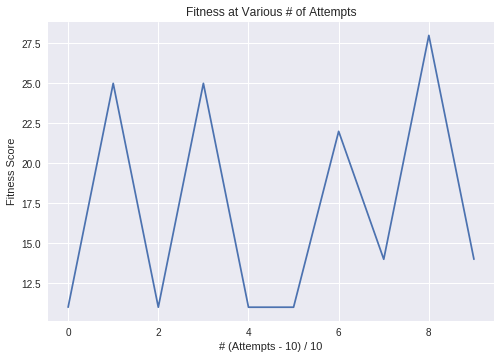

The maximum fitness score of 28.0 is obtained in 90 attempts.


In [8]:
SA_best_schedule = max(dic, key=lambda key: dic[key])

attempts = range(10, 110, 10)

best_score = 0
best_score_index = -1

fit_scores = [0] * len(attempts)

for i, a in enumerate(attempts):
  best_state, best_fitness = mlrose.simulated_annealing(problem, schedule = SA_best_schedule,
                                                        max_attempts = a, max_iters = 1000,
                                                        init_state = state)
#   print('Iteration ', str(i))
#   print('The best state found is: ', best_state)
#   print('The fitness at the best state is: ', best_fitness)
#   print('\n')

  fit_scores[i] = best_fitness

  if best_fitness > best_score:
    best_score = best_fitness
    best_score_index = (i + 1) * 10

plt.plot(fit_scores)

plt.title("Fitness at Various # of Attempts")
plt.xlabel("# (Attempts - 10) / 10")
plt.ylabel("Fitness Score")
plt.show()

print('The maximum fitness score of ' + str(best_score) + ' is obtained in ' + str(best_score_index) + ' attempts.')

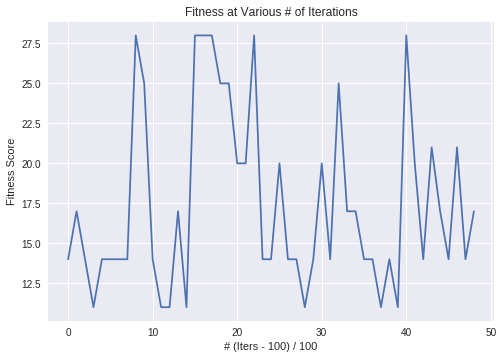

The maximum fitness score of 28.0 is obtained in 900 iterations.


In [11]:
SA_best_attempt = best_score_index

iters = range(100, 5000, 100)

def SA_iters(iters, best_schedule, best_attempt):
  best_score = 0
  best_score_index = -1
  
  fit_scores = [0] * len(iters)

  for i, a in enumerate(iters):
    best_state, best_fitness = mlrose.simulated_annealing(problem, schedule = best_schedule,
                                                          max_attempts = best_attempt, max_iters = a,
                                                          init_state = state)
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')

    fit_scores[i] = best_fitness
    
    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = (i + 1) * 100

  plt.plot(fit_scores)

  plt.title("Fitness at Various # of Iterations")
  plt.xlabel("# (Iters - 100) / 100")
  plt.ylabel("Fitness Score")
  plt.show()
  
  print('The maximum fitness score of ' + str(best_score) + ' is obtained in ' + str(best_score_index) + ' iterations.')
  
  return best_score_index, fit_scores

SA_results = SA_iters(iters, SA_best_schedule, SA_best_attempt)

SA_best_iter = SA_results[0]
  
SA_fit_scores = SA_results[1]

In [0]:
# Returns the maximum value  
# with knapsack of W capacity 
def knapSack(W, wt, val, n): 
  
    # dp[i] is going to store maximum  
    # value with knapsack capacity i. 
    dp = [0 for i in range(W + 1)] 
  
    ans = 0
  
    # Fill dp[] using above recursive formula 
    for i in range(W + 1): 
        for j in range(n): 
            if (wt[j] <= i): 
                dp[i] = max(dp[i], dp[i - wt[j]] + val[j]) 
    return dp[W] 

Weights:  [11, 4, 6, 2, 14]
Values:  [1, 2, 3, 4, 5]
Initial State:  [1 0 1 2 2]
N:  5
W:  22
The best state found is:  [0 2 1 4 0]
The fitness at the best state is:  23.0
The maximum fitness is:  44


Weights:  [11, 6, 11, 3, 11, 11]
Values:  [1, 2, 3, 4, 5, 6]
Initial State:  [1 2 0 0 0 1]
N:  6
W:  31
The best state found is:  [0 1 0 5 0 1]
The fitness at the best state is:  28.0
The maximum fitness is:  40


Weights:  [14, 10, 3, 9, 12, 13, 4]
Values:  [1, 2, 3, 4, 5, 6, 7]
Initial State:  [0 0 2 1 1 1 1]
N:  7
W:  39
The best state found is:  [6 5 0 1 2 3 4]
The fitness at the best state is:  0.0
The maximum fitness is:  66


Weights:  [6, 12, 9, 1, 8, 8, 6, 14]
Values:  [1, 2, 3, 4, 5, 6, 7, 8]
Initial State:  [0 2 2 1 2 2 0 2]
N:  8
W:  38
The best state found is:  [0 4 0 3 1 1 0 5]
The fitness at the best state is:  0.0
The maximum fitness is:  152


Weights:  [10, 13, 11, 9, 12, 4, 4, 14, 12]
Values:  [1, 2, 3, 4, 5, 6, 7, 8, 9]
Initial State:  [0 1 1 0 1 1 2 0 1]
N:  9
W:  53

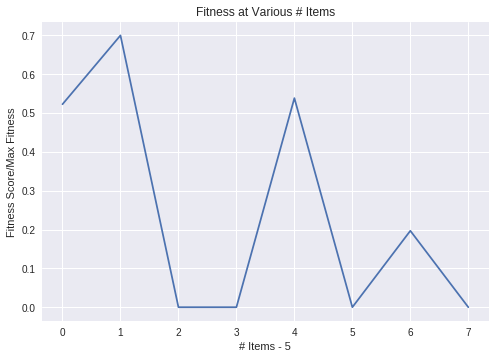

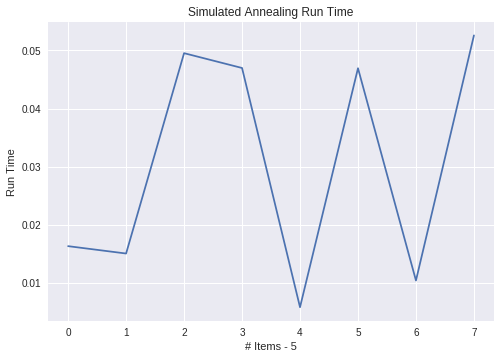

In [15]:
acc_SA_fit_scores = []
SA_times = []

for i in range(5, 13):
  weights = np.random.randint(1, 15, size=i).tolist()
  print('Weights: ', weights)
  
  values = np.array(np.arange(1, i + 1)).tolist()
  print('Values: ', values)
  
  max_weight_pct = 0.6
  fitness = mlrose.Knapsack(weights, values, max_weight_pct)
  
  state = np.random.randint(3, size=i)
  print('Initial State: ', state)
  
  problem = mlrose.DiscreteOpt(length = i, fitness_fn = fitness,
                           maximize = True, max_val =i)
  
  start_time = timeit.default_timer()
    
  best_state, best_fitness = mlrose.simulated_annealing(problem, schedule = SA_best_schedule,
                                                        max_attempts = SA_best_attempt, max_iters = SA_best_iter,
                                                        init_state = state) 
  
  end_time = timeit.default_timer()
  training_time = end_time - start_time
  SA_times.append(training_time)
    
  print('N: ', str(i))
  print('W: ', int(max_weight_pct * sum(weights)))
  print('The best state found is: ', best_state)
  print('The fitness at the best state is: ', best_fitness)
  max_fit = knapSack(int(max_weight_pct * sum(weights)), weights, values, i)
  print('The maximum fitness is: ', max_fit)
  print('\n')
  
  acc_SA_fit_scores.append(best_fitness / max_fit)

  
plt.plot(acc_SA_fit_scores)

plt.title("Fitness at Various # Items")
plt.xlabel("# Items - 5")
plt.ylabel("Fitness Score/Max Fitness")
plt.show()

plt.plot(SA_times)

plt.title("Simulated Annealing Run Time")
plt.xlabel("# Items - 5")
plt.ylabel("Run Time")
plt.show()

Genetic Algorithms
-------

In [16]:
weights = [10, 5, 2, 8, 15]
values = [1, 2, 3, 4, 5]
max_weight_pct = 0.6
fitness = mlrose.Knapsack(weights, values, max_weight_pct)

problem = mlrose.DiscreteOpt(length = 5, fitness_fn = fitness,
                         maximize = True, max_val = max(weights))

state = np.array([1, 0, 2, 1, 0])
fitness.evaluate(state)

11

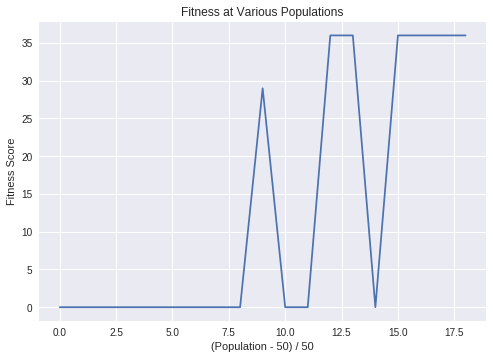

The maximum fitness score of 36.0 is obtained with population 650.


In [17]:
pop = range(50, 1000, 50)

def tune_pop(pop):
  best_score = 0
  best_score_index = -1
  
  fit_scores = [0] * len(pop)

  for i, a in enumerate(pop):
    best_state, best_fitness = mlrose.genetic_alg(problem, pop_size=a, mutation_prob=0.1, max_attempts=10, max_iters=np.inf)
    
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')

    fit_scores[i] = best_fitness
    
    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = (i + 1) * 50

  plt.plot(fit_scores)

  plt.title("Fitness at Various Populations")
  plt.xlabel("(Population - 50) / 50")
  plt.ylabel("Fitness Score")
  plt.show()
  
  print('The maximum fitness score of ' + str(best_score) + ' is obtained with population ' + str(best_score_index) + '.')
  
  return best_score_index

optimal_pop = tune_pop(pop)

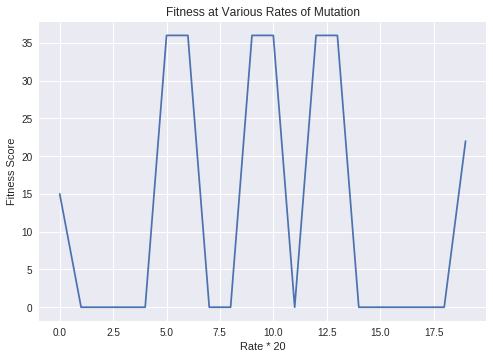

The maximum fitness score of 36.0 is obtained with mutation rate 0.25.


In [18]:
def tune_rate(optimal_pop):
  rate = 0.01
  
  best_score = 0
  best_score_index = -1
  
  fit_scores = [0] * 20

  for i in range(20):
    best_state, best_fitness = mlrose.genetic_alg(problem, pop_size=optimal_pop, mutation_prob=rate, max_attempts=10, max_iters=np.inf)
    
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')

    fit_scores[i] = best_fitness
    
    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = i * 0.05
      
    rate += 0.05

  plt.plot(fit_scores)

  plt.title("Fitness at Various Rates of Mutation")
  plt.xlabel("Rate * 20")
  plt.ylabel("Fitness Score")
  plt.show()
  
  print('The maximum fitness score of ' + str(best_score) + ' is obtained with mutation rate ' + str(best_score_index) + '.')
  
  return best_score_index

optimal_rate = tune_rate(optimal_pop)

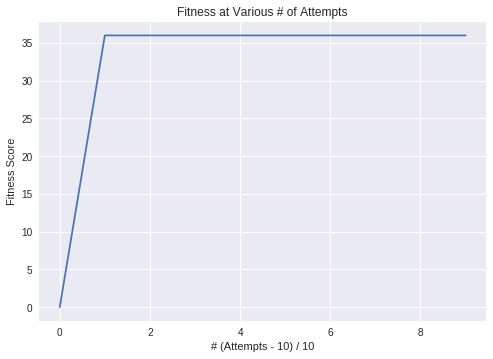

The maximum fitness score of 36.0 is obtained in 20 attempts.


In [19]:
def GA_tune_attempts(optimal_pop, optimal_rate):

  attempts = range(10, 110, 10)
  
  best_score = 0
  best_score_index = -1
  
  fit_scores = [0] * len(attempts)

  for i, a in enumerate(attempts):
    best_state, best_fitness = mlrose.genetic_alg(problem, pop_size=optimal_pop, mutation_prob=optimal_rate, max_attempts=a, max_iters=np.inf)
    
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')
  
    fit_scores[i] = best_fitness

    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = (i + 1) * 10

  plt.plot(fit_scores)

  plt.title("Fitness at Various # of Attempts")
  plt.xlabel("# (Attempts - 10) / 10")
  plt.ylabel("Fitness Score")
  plt.show()

  print('The maximum fitness score of ' + str(best_score) + ' is obtained in ' + str(best_score_index) + ' attempts.')
  
  return best_score_index

optimal_attempt = GA_tune_attempts(optimal_pop, optimal_rate)

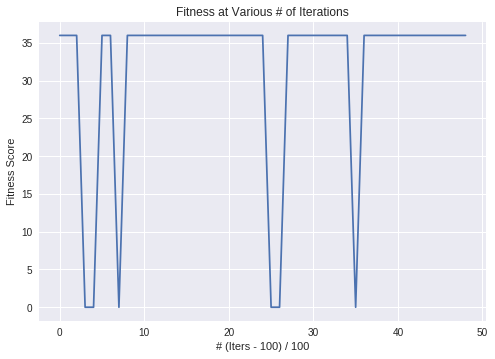

The maximum fitness score of 36.0 is obtained in 100 iterations.


In [24]:
def GA_iters(optimal_pop, optimal_rate, optimal_attempt):
  best_score = 0
  best_score_index = -1
  
  iters = range(100, 5000, 100)
  
  fit_scores = [0] * len(iters)

  for i, a in enumerate(iters):
    best_state, best_fitness = mlrose.genetic_alg(problem, pop_size=optimal_pop, mutation_prob=optimal_rate, max_attempts=optimal_attempt, max_iters=a)

  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')

    fit_scores[i] = best_fitness
    
    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = (i + 1) * 100

  plt.plot(fit_scores)

  plt.title("Fitness at Various # of Iterations")
  plt.xlabel("# (Iters - 100) / 100")
  plt.ylabel("Fitness Score")
  plt.show()
  
  print('The maximum fitness score of ' + str(best_score) + ' is obtained in ' + str(best_score_index) + ' iterations.')
  
  return best_score_index, fit_scores

GA_best_iter, GA_fit_scores = GA_iters(optimal_pop, optimal_rate, optimal_attempt)

Weights:  [6, 2, 12, 10, 1]
Values:  [1, 2, 3, 4, 5]
Initial State:  [1 0 1 0 0]
N:  5
W:  18
The best state found is:  [1 4 0 0 4]
The fitness at the best state is:  29.0
The maximum fitness is:  90


Weights:  [12, 8, 3, 10, 7, 10]
Values:  [1, 2, 3, 4, 5, 6]
Initial State:  [1 0 2 2 1 2]
N:  6
W:  30
The best state found is:  [0 0 5 0 2 0]
The fitness at the best state is:  25.0
The maximum fitness is:  30


Weights:  [6, 10, 8, 1, 8, 9, 3]
Values:  [1, 2, 3, 4, 5, 6, 7]
Initial State:  [0 2 1 2 1 2 1]
N:  7
W:  27
The best state found is:  [0 0 0 6 0 0 6]
The fitness at the best state is:  66.0
The maximum fitness is:  108


Weights:  [12, 7, 11, 3, 13, 9, 8, 11]
Values:  [1, 2, 3, 4, 5, 6, 7, 8]
Initial State:  [1 0 1 0 1 2 1 2]
N:  8
W:  44
The best state found is:  [0 0 0 7 0 0 3 0]
The fitness at the best state is:  49.0
The maximum fitness is:  56


Weights:  [6, 4, 4, 13, 1, 1, 10, 8, 5]
Values:  [1, 2, 3, 4, 5, 6, 7, 8, 9]
Initial State:  [1 2 0 2 2 1 1 2 1]
N:  9
W:  31
The

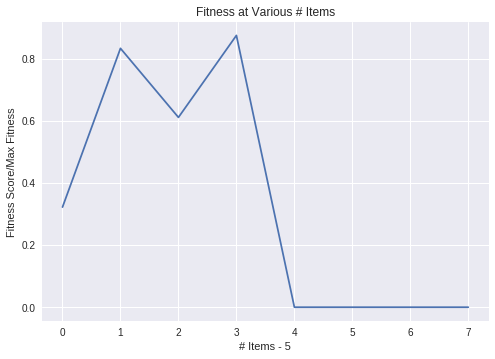

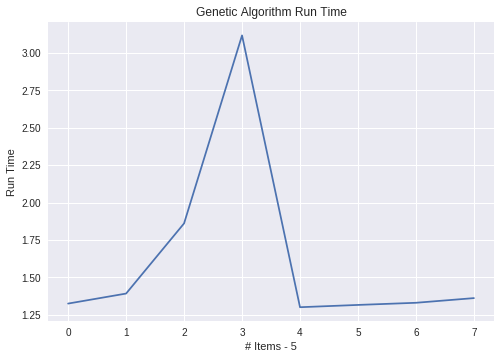

In [27]:
acc_GA_fit_scores = []
GA_times = []

for i in range(5, 13):
  weights = np.random.randint(1, 15, size=i).tolist()
  print('Weights: ', weights)
  
  values = np.array(np.arange(1, i + 1)).tolist()
  print('Values: ', values)
  
  max_weight_pct = 0.6
  fitness = mlrose.Knapsack(weights, values, max_weight_pct)
  
  state = np.random.randint(3, size=i)
  print('Initial State: ', state)
  
  problem = mlrose.DiscreteOpt(length = i, fitness_fn = fitness,
                           maximize = True, max_val=i)
  
  start_time = timeit.default_timer()
    
  best_state, best_fitness = mlrose.genetic_alg(problem, pop_size=optimal_pop, mutation_prob=optimal_rate, max_attempts=optimal_attempt, max_iters=GA_best_iter)
  
  end_time = timeit.default_timer()
  training_time = end_time - start_time
  GA_times.append(training_time)
    
  print('N: ', str(i))
  print('W: ', int(max_weight_pct * sum(weights)))
  print('The best state found is: ', best_state)
  print('The fitness at the best state is: ', best_fitness)
  max_fit = knapSack(int(max_weight_pct * sum(weights)), weights, values, i)
  print('The maximum fitness is: ', max_fit)
  print('\n')
  
  acc_GA_fit_scores.append(best_fitness / max_fit)

  
plt.plot(acc_GA_fit_scores)

plt.title("Fitness at Various # Items")
plt.xlabel("# Items - 5")
plt.ylabel("Fitness Score/Max Fitness")
plt.show()

plt.plot(GA_times)

plt.title("Genetic Algorithm Run Time")
plt.xlabel("# Items - 5")
plt.ylabel("Run Time")
plt.show()

MIMIC
-----

In [28]:
weights = [10, 5, 2, 8, 15]
values = [1, 2, 3, 4, 5]
max_weight_pct = 0.6
fitness = mlrose.Knapsack(weights, values, max_weight_pct)

problem = mlrose.DiscreteOpt(length = 5, fitness_fn = fitness,
                         maximize = True, max_val = 5)

state = np.array([1, 0, 2, 1, 0])
fitness.evaluate(state)

11

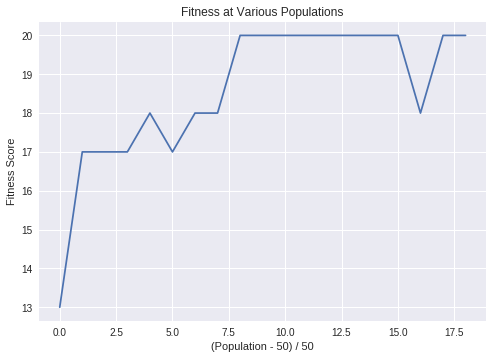

The maximum fitness score of 20.0 is obtained with population 450.


In [29]:
pop = range(50, 1000, 50)

def MIMIC_tune_pop(pop):
  best_score = 0
  best_score_index = -1
  
  fit_scores = [0] * len(pop)

  for i, a in enumerate(pop):
    best_state, best_fitness = mlrose.mimic(problem, pop_size=a, keep_pct=0.2, max_attempts=10,
          max_iters=np.inf)
    
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')

    fit_scores[i] = best_fitness
    
    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = (i + 1) * 50

  plt.plot(fit_scores)

  plt.title("Fitness at Various Populations")
  plt.xlabel("(Population - 50) / 50")
  plt.ylabel("Fitness Score")
  plt.show()
  
  print('The maximum fitness score of ' + str(best_score) + ' is obtained with population ' + str(best_score_index) + '.')
  
  return best_score_index

MIMIC_optimal_pop = MIMIC_tune_pop(pop)

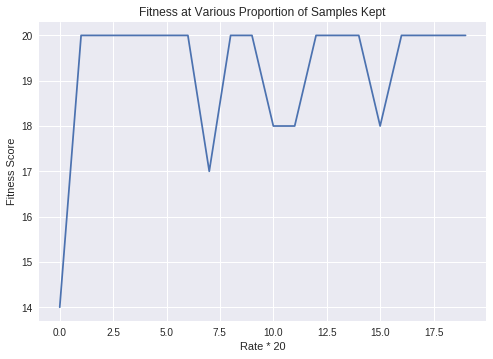

The maximum fitness score of 20.0 is obtained with 0.05 proportion samples kept.


In [30]:
def MIMIC_tune_rate(optimal_pop):
  rate = 0.01
  
  best_score = 0
  best_score_index = -1
  
  fit_scores = [0] * 20

  for i in range(20):
    best_state, best_fitness = mlrose.mimic(problem, pop_size=optimal_pop, keep_pct=rate, max_attempts=10,
          max_iters=np.inf)
    
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')

    fit_scores[i] = best_fitness
    
    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = i * 0.05
      
    rate += 0.05

  plt.plot(fit_scores)

  plt.title("Fitness at Various Proportion of Samples Kept")
  plt.xlabel("Rate * 20")
  plt.ylabel("Fitness Score")
  plt.show()
  
  print('The maximum fitness score of ' + str(best_score) + ' is obtained with ' + str(best_score_index) + ' proportion samples kept.')
  
  
  return best_score_index

MIMIC_optimal_rate = MIMIC_tune_rate(MIMIC_optimal_pop)

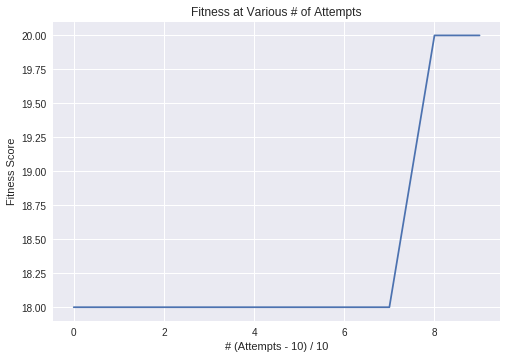

The maximum fitness score of 20.0 is obtained in 90 attempts.


In [33]:
def MIMIC_tune_attempts(optimal_pop, optimal_rate):

  attempts = range(10, 110, 10)
  
  best_score = 0
  best_score_index = -1
  
  fit_scores = [0] * len(attempts)

  for i, a in enumerate(attempts):
    best_state, best_fitness = mlrose.mimic(problem, pop_size=optimal_pop, keep_pct=optimal_rate, max_attempts=a,
          max_iters=np.inf)  
    
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')
  
    fit_scores[i] = best_fitness

    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = (i + 1) * 10

  plt.plot(fit_scores)

  plt.title("Fitness at Various # of Attempts")
  plt.xlabel("# (Attempts - 10) / 10")
  plt.ylabel("Fitness Score")
  plt.show()

  print('The maximum fitness score of ' + str(best_score) + ' is obtained in ' + str(best_score_index) + ' attempts.')
  
    
  return best_score_index

MIMIC_optimal_attempt = MIMIC_tune_attempts(MIMIC_optimal_pop, MIMIC_optimal_rate)

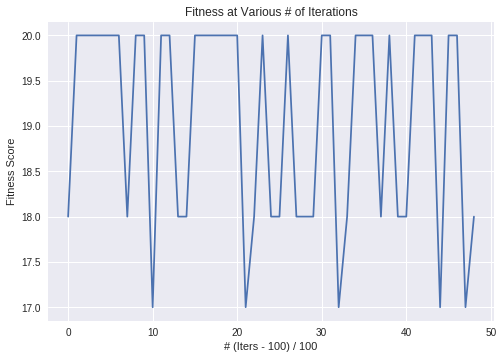

The maximum fitness score of 20.0 is obtained in 200 iterations.


In [34]:
def MIMIC_iters(optimal_pop, optimal_rate, optimal_attempt):
  best_score = 0
  best_score_index = -1
  
  iters = range(100, 5000, 100)
  
  fit_scores = [0] * len(iters)

  for i, a in enumerate(iters):
    best_state, best_fitness = mlrose.mimic(problem, pop_size=optimal_pop, keep_pct=optimal_rate, max_attempts=optimal_attempt,
          max_iters=a) 
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')

    fit_scores[i] = best_fitness
    
    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = (i + 1) * 100

  plt.plot(fit_scores)

  plt.title("Fitness at Various # of Iterations")
  plt.xlabel("# (Iters - 100) / 100")
  plt.ylabel("Fitness Score")
  plt.show()
  
  print('The maximum fitness score of ' + str(best_score) + ' is obtained in ' + str(best_score_index) + ' iterations.')
  
  return best_score_index, fit_scores

MIMIC_best_iter, MIMIC_fit_scores = MIMIC_iters(MIMIC_optimal_pop, MIMIC_optimal_rate, MIMIC_optimal_attempt)

Weights:  [6, 6, 11, 13, 11]
Values:  [1, 2, 3, 4, 5]
Initial State:  [1 2 0 0 2]
N:  5
W:  28
The best state found is:  [0 1 0 0 2]
The fitness at the best state is:  12.0
The maximum fitness is:  12


Weights:  [6, 4, 5, 3, 5, 13]
Values:  [1, 2, 3, 4, 5, 6]
Initial State:  [2 0 2 1 1 2]
N:  6
W:  21
The best state found is:  [0 0 0 2 3 0]
The fitness at the best state is:  23.0
The maximum fitness is:  28


Weights:  [6, 7, 6, 11, 3, 1, 2]
Values:  [1, 2, 3, 4, 5, 6, 7]
Initial State:  [1 1 2 0 1 1 0]
N:  7
W:  21
The best state found is:  [1 0 0 0 0 6 4]
The fitness at the best state is:  65.0
The maximum fitness is:  126


Weights:  [3, 1, 9, 10, 10, 7, 2, 7]
Values:  [1, 2, 3, 4, 5, 6, 7, 8]
Initial State:  [2 2 2 2 0 0 0 2]
N:  8
W:  29
The best state found is:  [1 3 0 7 0 1 5 6]
The fitness at the best state is:  0.0
The maximum fitness is:  100


Weights:  [8, 11, 3, 1, 3, 9, 5, 6, 12]
Values:  [1, 2, 3, 4, 5, 6, 7, 8, 9]
Initial State:  [1 2 2 2 1 2 1 2 2]
N:  9
W:  34
The be

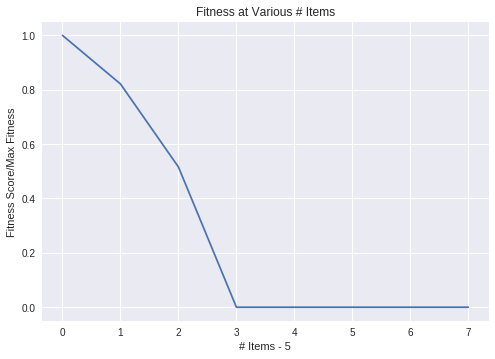

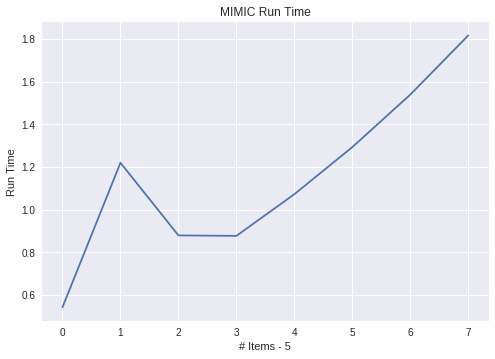

In [35]:
acc_MIMIC_fit_scores = []
MIMIC_times = []

for i in range(5, 13):
  weights = np.random.randint(1, 15, size=i).tolist()
  print('Weights: ', weights)
  
  values = np.array(np.arange(1, i + 1)).tolist()
  print('Values: ', values)
  
  max_weight_pct = 0.6
  fitness = mlrose.Knapsack(weights, values, max_weight_pct)
  
  state = np.random.randint(3, size=i)
  print('Initial State: ', state)
  
  problem = mlrose.DiscreteOpt(length = i, fitness_fn = fitness,
                           maximize = True, max_val = i)
  
  start_time = timeit.default_timer()
    
  best_state, best_fitness = mlrose.mimic(problem, pop_size=optimal_pop, keep_pct=optimal_rate, max_attempts=optimal_attempt,
        max_iters=MIMIC_best_iter) 
  
  end_time = timeit.default_timer()
  training_time = end_time - start_time
  MIMIC_times.append(training_time)
    
  print('N: ', str(i))
  print('W: ', int(max_weight_pct * sum(weights)))
  print('The best state found is: ', best_state)
  print('The fitness at the best state is: ', best_fitness)
  max_fit = knapSack(int(max_weight_pct * sum(weights)), weights, values, i)
  print('The maximum fitness is: ', max_fit)
  print('\n')
  
  acc_MIMIC_fit_scores.append(best_fitness / max_fit)

  
plt.plot(acc_MIMIC_fit_scores)

plt.title("Fitness at Various # Items")
plt.xlabel("# Items - 5")
plt.ylabel("Fitness Score/Max Fitness")
plt.show()

plt.plot(MIMIC_times)

plt.title("MIMIC Run Time")
plt.xlabel("# Items - 5")
plt.ylabel("Run Time")
plt.show()

Randomized Hill Climbing
-----

In [79]:
weights = [10, 5, 2, 8, 15]
values = [1, 2, 3, 4, 5]
max_weight_pct = 0.6
fitness = mlrose.Knapsack(weights, values, max_weight_pct)

problem = mlrose.DiscreteOpt(length = 5, fitness_fn = fitness,
                         maximize = True, max_val = 5)

state = np.array([1, 0, 2, 1, 0])
fitness.evaluate(state)

11

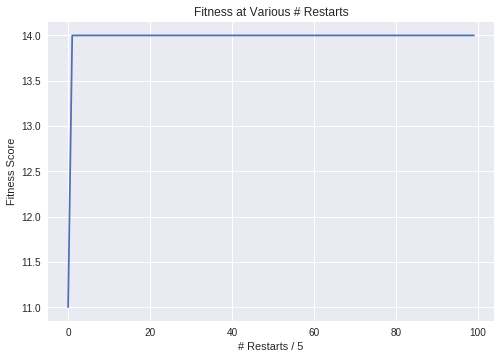

The maximum fitness score of 14.0 is obtained with 5 restarts.


In [80]:
restarts = range(0, 500, 5)

def tune_restarts(restarts):
  best_score = 0
  best_score_index = -1
  
  fit_scores = [0] * len(restarts)

  for i, a in enumerate(restarts):
    best_state, best_fitness = mlrose.random_hill_climb(problem, max_attempts=10, max_iters=np.inf, restarts=a,
                      init_state=state)
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')

    fit_scores[i] = best_fitness
    
    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = i * 5

  plt.plot(fit_scores)

  plt.title("Fitness at Various # Restarts")
  plt.xlabel("# Restarts / 5")
  plt.ylabel("Fitness Score")
  plt.show()
  
  print('The maximum fitness score of ' + str(best_score) + ' is obtained with ' + str(best_score_index) + ' restarts.')
  
  return best_score_index

optimal_restarts = tune_restarts(restarts)


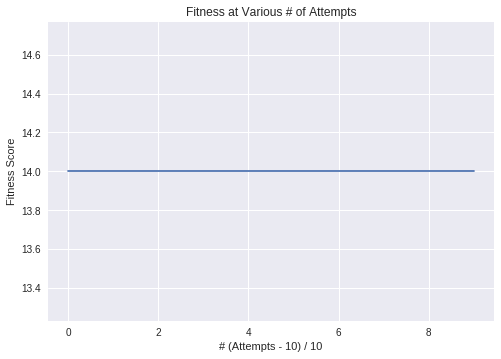

The maximum fitness score of 14.0 is obtained in 10 attempts.


In [82]:
def RHC_tune_attempts(optimal_restarts):

  attempts = range(10, 110, 10)
  
  best_score = 0
  best_score_index = -1
  
  fit_scores = [0] * len(attempts)

  for i, a in enumerate(attempts):
    best_state, best_fitness = mlrose.random_hill_climb(problem, max_attempts=a, max_iters=np.inf, restarts=optimal_restarts,
                      init_state=state)
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')
  
    fit_scores[i] = best_fitness

    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = (i + 1) * 10

  plt.plot(fit_scores)

  plt.title("Fitness at Various # of Attempts")
  plt.xlabel("# (Attempts - 10) / 10")
  plt.ylabel("Fitness Score")
  plt.show()

  print('The maximum fitness score of ' + str(best_score) + ' is obtained in ' + str(best_score_index) + ' attempts.')
  
  return best_score_index

RHC_optimal_attempt = RHC_tune_attempts(optimal_restarts)

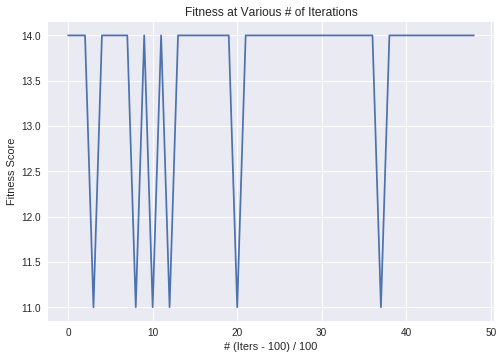

The maximum fitness score of 14.0 is obtained in 100 iterations.


In [83]:
def RHC_iters(optimal_restarts, optimal_attempt):
  best_score = 0
  best_score_index = -1
  
  iters = range(100, 5000, 100)
  
  fit_scores = [0] * len(iters)

  for i, a in enumerate(iters):
    best_state, best_fitness = mlrose.random_hill_climb(problem, max_attempts=optimal_attempt, max_iters=a, restarts=optimal_restarts,
                      init_state=state) 
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')

    fit_scores[i] = best_fitness
    
    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = (i + 1) * 100

  plt.plot(fit_scores)

  plt.title("Fitness at Various # of Iterations")
  plt.xlabel("# (Iters - 100) / 100")
  plt.ylabel("Fitness Score")
  plt.show()
  
  print('The maximum fitness score of ' + str(best_score) + ' is obtained in ' + str(best_score_index) + ' iterations.')
  
  return best_score_index, fit_scores

RHC_best_iter, RHC_fit_scores = RHC_iters(optimal_restarts, RHC_optimal_attempt)

Weights:  [18, 10, 18, 16, 15]
Values:  [1, 2, 3, 4, 5]
Initial State:  [0 0 1 2 0]
N:  5
W:  46
The best state found is:  [0 1 1 1 0]
The fitness at the best state is:  9.0
The maximum fitness is:  15


Weights:  [2, 17, 7, 16, 7, 17]
Values:  [1, 2, 3, 4, 5, 6]
Initial State:  [2 2 1 1 0 1]
N:  6
W:  39
The best state found is:  [2 2 1 1 0 1]
The fitness at the best state is:  0.0
The maximum fitness is:  27


Weights:  [4, 7, 17, 15, 3, 18, 7]
Values:  [1, 2, 3, 4, 5, 6, 7]
Initial State:  [2 2 2 1 0 0 0]
N:  7
W:  42
The best state found is:  [3 2 0 1 0 0 0]
The fitness at the best state is:  11.0
The maximum fitness is:  70


Weights:  [17, 14, 11, 12, 17, 7, 8, 16]
Values:  [1, 2, 3, 4, 5, 6, 7, 8]
Initial State:  [1 2 0 2 1 2 1 2]
N:  8
W:  61
The best state found is:  [1 2 0 2 1 2 1 2]
The fitness at the best state is:  0.0
The maximum fitness is:  53


Weights:  [7, 3, 1, 19, 3, 11, 7, 10, 9]
Values:  [1, 2, 3, 4, 5, 6, 7, 8, 9]
Initial State:  [1 0 2 0 2 0 2 1 0]
N:  9
W:  42

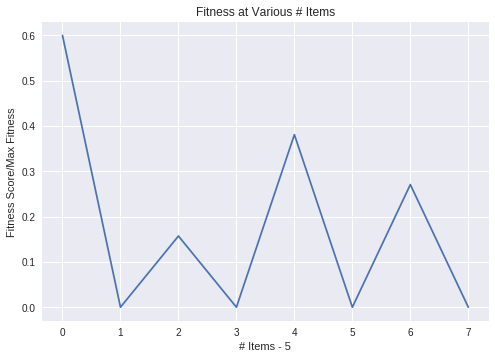

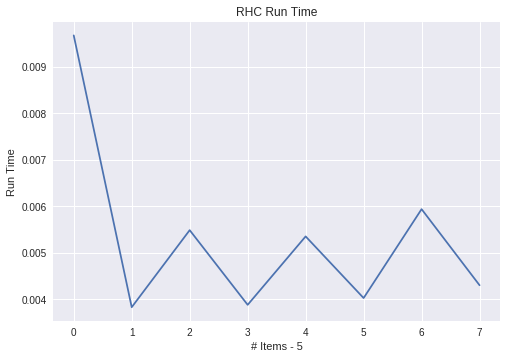

In [84]:
acc_RHC_fit_scores = []
RHC_times = []

for i in range(5, 13):
  weights = np.random.randint(1, 20, size=i).tolist()
  print('Weights: ', weights)
  
  values = np.array(np.arange(1, i + 1)).tolist()
  print('Values: ', values)
  
  max_weight_pct = 0.6
  fitness = mlrose.Knapsack(weights, values, max_weight_pct)
  
  state = np.random.randint(3, size=i)
  print('Initial State: ', state)
  
  problem = mlrose.DiscreteOpt(length = i, fitness_fn = fitness,
                           maximize = True, max_val = i)
  
  start_time = timeit.default_timer()
    
  best_state, best_fitness = mlrose.random_hill_climb(problem, max_attempts=optimal_attempt, max_iters=RHC_best_iter, restarts=optimal_restarts,
                    init_state=state) 
  
  end_time = timeit.default_timer()
  training_time = end_time - start_time
  RHC_times.append(training_time)
    
  print('N: ', str(i))
  print('W: ', int(max_weight_pct * sum(weights)))
  print('The best state found is: ', best_state)
  print('The fitness at the best state is: ', best_fitness)
  max_fit = knapSack(int(max_weight_pct * sum(weights)), weights, values, i)
  print('The maximum fitness is: ', max_fit)
  print('\n')
  
  acc_RHC_fit_scores.append(best_fitness / max_fit)

  
plt.plot(acc_RHC_fit_scores)

plt.title("Fitness at Various # Items")
plt.xlabel("# Items - 5")
plt.ylabel("Fitness Score/Max Fitness")
plt.show()

plt.plot(RHC_times)

plt.title("RHC Run Time")
plt.xlabel("# Items - 5")
plt.ylabel("Run Time")
plt.show()

Technique Comparison Plots
-----

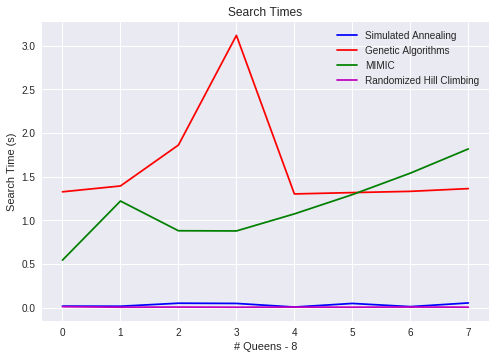

In [85]:
def compare_time(SA_times, GA_times, MIMIC_times, RHC_times):
    
    plt.figure()
    plt.title("Search Times")
    plt.xlabel("# Queens - 8")
    plt.ylabel("Search Time (s)")
    plt.plot(SA_times, '-', color="b", label="Simulated Annealing")
    plt.plot(GA_times, '-', color="r", label="Genetic Algorithms")
    plt.plot(MIMIC_times, '-', color="g", label="MIMIC")
    plt.plot(RHC_times, '-', color="m", label="Randomized Hill Climbing")
    plt.legend(loc="best")
    plt.show()
    
compare_time(SA_times, GA_times, MIMIC_times, RHC_times)

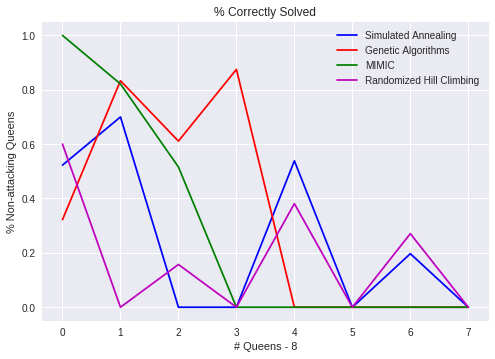

In [86]:
def compare_acc(SA_scores, GA_scores, MIMIC_scores, RHC_scores):
    
    plt.figure()
    plt.title("% Correctly Solved")
    plt.xlabel("# Queens - 8")
    plt.ylabel("% Non-attacking Queens")
    plt.plot(SA_scores, '-', color="b", label="Simulated Annealing")
    plt.plot(GA_scores, '-', color="r", label="Genetic Algorithms")
    plt.plot(MIMIC_scores, '-', color="g", label="MIMIC")
    plt.plot(RHC_scores, '-', color="m", label="Randomized Hill Climbing")
    plt.legend(loc="best")
    plt.show()
    
compare_acc(acc_SA_fit_scores, acc_GA_fit_scores, acc_MIMIC_fit_scores, acc_RHC_fit_scores)